In [1]:
%matplotlib inline

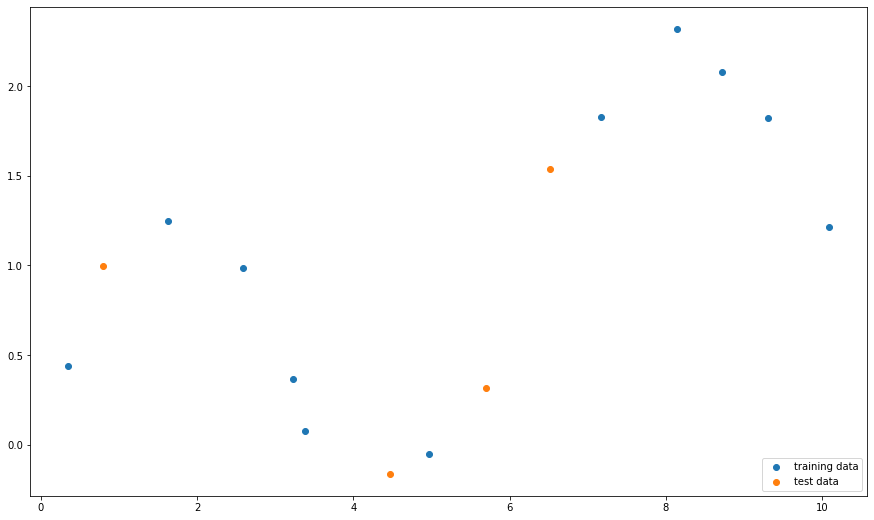

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5 # 15 buckets for the range 0:10 +/- some noise
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    
    plt.figure(figsize=(15,9))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.

part1_scatter()

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 0: transform the data (aka add some wiggle) before fitting
x_poly1 = PolynomialFeatures(1).fit_transform(x.reshape(-1,1)) 
x_poly3 = PolynomialFeatures(3).fit_transform(x.reshape(-1,1)) 
x_poly6 = PolynomialFeatures(6).fit_transform(x.reshape(-1,1)) 
x_poly9 = PolynomialFeatures(9).fit_transform(x.reshape(-1,1)) 

# Step 1: create training & test sets
X1_train, X1_test, y_train, y_test = train_test_split(x_poly1, y, random_state=0)
X3_train, X3_test, y_train, y_test = train_test_split(x_poly3, y, random_state=0)
X6_train, X6_test, y_train, y_test = train_test_split(x_poly6, y, random_state=0)
X9_train, X9_test, y_train, y_test = train_test_split(x_poly9, y, random_state=0)

# Step 2: train/fit the model 
poly1_fit = LinearRegression().fit(X1_train, y_train)
poly3_fit = LinearRegression().fit(X3_train, y_train)
poly6_fit = LinearRegression().fit(X6_train, y_train)
poly9_fit = LinearRegression().fit(X9_train, y_train)

# Step 3: generate and return predicted ys for x = np.linspace(0,10,100) as a (4,100) array
x100 = np.linspace(0,10,100)

# calculate required polynomials
x100_poly1 = poly1.fit_transform(x100.reshape(-1,1)) 
x100_poly3 = poly3.fit_transform(x100.reshape(-1,1)) 
x100_poly6 = poly6.fit_transform(x100.reshape(-1,1)) 
x100_poly9 = poly9.fit_transform(x100.reshape(-1,1)) 

# get predicted ys for each
poly1_y100 = poly1_fit.predict(x100_poly1)
poly3_y100 = poly3_fit.predict(x100_poly3)
poly6_y100 = poly6_fit.predict(x100_poly6)
poly9_y100 = poly9_fit.predict(x100_poly9)

answer_one = np.array([poly1_y100, poly3_y100, poly6_y100, poly9_y100])


(4, 100)

In [63]:
# Scoring function
def output_scores(model, X_train, X_test, y_train, y_test):
    print('linear model coeff (w): {}'
         .format(model.coef_))
    print('linear model intercept (b): {:.3f}'
         .format(model.intercept_))
    print('R-squared score (training): {:.3f}'
         .format(model.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
         .format(model.score(X_test, y_test)))

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [72]:
# degree range from 0 to 9
degrees = np.arange(0, 10, 1)

# step 0 transform x (create polynomial generators and calculate polynomials)
transformed_x = [ PolynomialFeatures(i).fit_transform(x.reshape(-1,1)) for i in degrees ]

# step 1 split data
#for i in transformed_x: train_test_split(i,y ...